<a href="https://colab.research.google.com/github/Ranjani94/Deep_Learning/blob/master/Graded_Assignment_1/graded_assign_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'Deep_Learning/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os
import pandas as pd
import pickle

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from keras.utils import np_utils
from sklearn.metrics import classification_report, confusion_matrix

Using TensorFlow backend.


#Importing dataset using SKLEARN library

In [0]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True)
train_x, train_y = mnist["data"], mnist["target"]

In [5]:
train_x.shape

(70000, 784)

In [6]:
train_y.shape

(70000,)

#Normalizing the dataset

In [0]:
train_x = train_x / 255

#Mnist classifier can predict the labels, to build a zero classifier we have to overwrite the labels

In [0]:
y= np.zeros(train_y.shape)
y[np.where(train_y == 0.0)[0]] = 1
train_y = y

#Splitting the dataset into train and test data

In [0]:
data = 60000
data_test = train_x.shape[0] - data

X_train, X_test = train_x[:data].T, train_x[data:].T
y_train, y_test = train_y[:data].reshape(1,data), train_y[data:].reshape(1,data_test)

In [10]:
X_train.shape

(784, 60000)

In [11]:
X_test.shape

(784, 10000)

In [12]:
y_train.shape

(1, 60000)

In [13]:
y_test.shape

(1, 10000)

#Shuffling the training dataset to get a good accuracy

In [0]:
np.random.seed(138)
s_idx = np.random.permutation(data)
X_train, y_train = X_train[:,s_idx], y_train[:,s_idx]

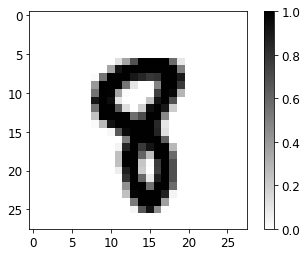

[0.]


In [15]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

i=3
plt.figure()
plt.imshow(X_train[:,i].reshape(28,28), cmap = matplotlib.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()
print(y_train[:,i])

#Applying sigmoid function

In [0]:
def sigmoid(x):
    s = 1 / (1 + np.exp(-x))
    return s

In [0]:
def compute_loss(Y, Y_hat):

    m = Y.shape[1]
    L = -(1./m) * ( np.sum( np.multiply(np.log(Y_hat),Y) ) + np.sum( np.multiply(np.log(1-Y_hat),(1-Y)) ) )

    return L

In [19]:
X = X_train
Y = y_train

n_x = X.shape[0]
n_h = 64
learning_rate = 1

W1 = np.random.randn(n_h, n_x)
b1 = np.zeros((n_h, 1))
W2 = np.random.randn(1, n_h)
b2 = np.zeros((1, 1))

for i in range(2000):

    Z1 = np.matmul(W1, X) + b1
    A1 = sigmoid(Z1)
    Z2 = np.matmul(W2, A1) + b2
    A2 = sigmoid(Z2)

    cost = compute_loss(Y, A2)

    dZ2 = A2-Y
    dW2 = (1./data) * np.matmul(dZ2, A1.T)
    db2 = (1./data) * np.sum(dZ2, axis=1, keepdims=True)

    dA1 = np.matmul(W2.T, dZ2)
    dZ1 = dA1 * sigmoid(Z1) * (1 - sigmoid(Z1))
    dW1 = (1./data) * np.matmul(dZ1, X.T)
    db1 = (1./data) * np.sum(dZ1, axis=1, keepdims=True)

    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1

    if i % 100 == 0:
        print("Epoch", i, "cost: ", cost)

print("Final cost:", cost)

Epoch 0 cost:  0.047308198509765156
Epoch 100 cost:  0.00045293982756061896
Epoch 200 cost:  0.00022610307392980757
Epoch 300 cost:  0.0001509332922705586
Epoch 400 cost:  0.0001133945444593101
Epoch 500 cost:  9.08692714295115e-05
Epoch 600 cost:  7.584382052885973e-05
Epoch 700 cost:  6.510314289091009e-05
Epoch 800 cost:  5.704088621319394e-05
Epoch 900 cost:  5.076487613418235e-05
Epoch 1000 cost:  4.573981254647755e-05
Epoch 1100 cost:  4.162499785817973e-05
Epoch 1200 cost:  3.819324257250906e-05
Epoch 1300 cost:  3.5287211432217155e-05
Epoch 1400 cost:  3.279448153916168e-05
Epoch 1500 cost:  3.0632577491112806e-05
Epoch 1600 cost:  2.873961776925574e-05
Epoch 1700 cost:  2.7068261680497992e-05
Epoch 1800 cost:  2.558167333327507e-05
Epoch 1900 cost:  2.4250759613098957e-05
Final cost: 2.3063631284215528e-05


In [20]:
Z1 = np.matmul(W1, X_test) + b1
A1 = sigmoid(Z1)
Z2 = np.matmul(W2, A1) + b2
A2 = sigmoid(Z2)

predictions = (A2>.5)[0,:]
labels = (y_test == 1)[0,:]

print(confusion_matrix(predictions, labels))
print(classification_report(predictions, labels))

[[10000]]
              precision    recall  f1-score   support

       False       1.00      1.00      1.00     10000

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000

